# IMDB 电影评论分类
工具：Keras

In [1]:
from keras.datasets import imdb
from keras import models
from keras import layers

Using TensorFlow backend.


In [4]:
#加载数据集
(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

In [5]:
print(train_data.shape)

(25000,)


In [6]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [16]:
import numpy as np
def vectorize_squences(sequences,dimension=10000):
    #将列表数据 numpy化，同时one-hot编码
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

In [17]:
# raw data 预处理
x_train = vectorize_squences(train_data)
x_test = vectorize_squences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [18]:
# 定义网络模型
model = models.Sequential()

model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [19]:
# compile
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
x_val = x_train[:8000]
y_val = y_train[:8000]
partial_x_train = x_train[8000:]
partial_y_train = y_train[8000:]
# train
history = model.fit(partial_x_train,partial_y_train,epochs=10,batch_size=512,validation_data=(x_val,y_val))

Train on 17000 samples, validate on 8000 samples
Epoch 1/10
17000/17000 [==============================] - 2s 99us/step - loss: 0.0407 - acc: 0.9904 - val_loss: 0.4216 - val_acc: 0.8764
Epoch 2/10
17000/17000 [==============================] - 2s 99us/step - loss: 0.0323 - acc: 0.9929 - val_loss: 0.4524 - val_acc: 0.8759
Epoch 3/10
17000/17000 [==============================] - 2s 99us/step - loss: 0.0265 - acc: 0.9940 - val_loss: 0.4879 - val_acc: 0.8736
Epoch 4/10
17000/17000 [==============================] - 2s 100us/step - loss: 0.0186 - acc: 0.9971 - val_loss: 0.5306 - val_acc: 0.8697
Epoch 5/10
17000/17000 [==============================] - 2s 100us/step - loss: 0.0169 - acc: 0.9972 - val_loss: 0.5520 - val_acc: 0.8701
Epoch 6/10
17000/17000 [==============================] - 2s 101us/step - loss: 0.0112 - acc: 0.9991 - val_loss: 0.5766 - val_acc: 0.8714
Epoch 7/10
17000/17000 [==============================] - 2s 100us/step - loss: 0.0120 - acc: 0.9977 - val_loss: 0.6065 - val_

In [23]:
history.history

{'val_loss': [0.4215784363746643,
  0.45237259125709534,
  0.48791265535354617,
  0.5305930500030518,
  0.5519799375534058,
  0.5766066222190857,
  0.6065014877319336,
  0.7054068264961243,
  0.6716374254226685,
  0.742817400932312],
 'val_acc': [0.876375,
  0.8758749990463257,
  0.8736250009536743,
  0.8697499990463257,
  0.8701250009536743,
  0.8713749990463256,
  0.8706249995231629,
  0.85775,
  0.8678750004768372,
  0.8611250004768372],
 'loss': [0.04068697059680434,
  0.03225468056166873,
  0.02650549972407958,
  0.01862649427792605,
  0.016891134937896447,
  0.011222708706031828,
  0.011975410714307253,
  0.005600719335324624,
  0.007083956230979632,
  0.0027455755632151578],
 'acc': [0.9904117648461286,
  0.9928823530814227,
  0.9940000001402463,
  0.9970588234452641,
  0.9971764707284815,
  0.9990588235294118,
  0.9977058823529412,
  0.9997058823529412,
  0.9990588235294118,
  0.9999411764705882]}

In [25]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


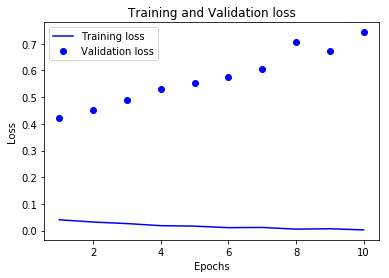

In [30]:
# 画图观察损失函数变化情况
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(train_loss)+1)
plt.plot(epochs, train_loss,'b',label='Training loss')
plt.plot(epochs, val_loss,'bo',label='Validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

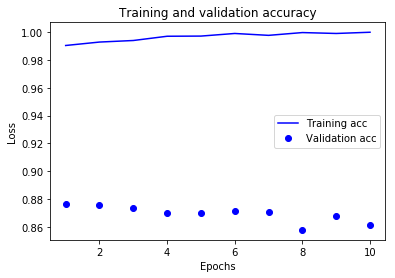

In [31]:
plt.clf()
train_acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, train_acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'bo', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

训练集和测试集上表现差异太大。模型发生过拟合。在epoch=4时停止训练

In [32]:
#重新训练
model = models.Sequential()

model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history = model.fit(x_train,y_train,epochs=4,batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.4532 - acc: 0.8321
Epoch 2/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.2654 - acc: 0.9068
Epoch 3/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.2031 - acc: 0.9288
Epoch 4/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.1711 - acc: 0.9384


In [34]:
#使用训练好的模型进行评估
results = model.evaluate(x_test,y_test)

25000/25000 [==============================] - 1s 51us/step


In [35]:
results

[0.2896917193317413, 0.88512]

准确率为88%

In [36]:
#使用训练好的模型进行预测
model.predict(x_test)

array([[0.21442494],
       [0.9999275 ],
       [0.8590876 ],
       ...,
       [0.1130496 ],
       [0.08924533],
       [0.7394258 ]], dtype=float32)

In [40]:
#看原始评论数据---第二条
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])#得到 id-words 对应关系

In [45]:
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in test_data[1]])

In [46]:
decoded_review # 正面评估---预测正确

"? this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances ? the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere ? with sexual tension and psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the ? moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual ? and desperation be patient ? up the atmosphere and pay attenti